In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
X.duplicated().sum()

1

In [ ]:
X['target'] = y

In [ ]:
X.drop_duplicates(inplace=True)

# Feature Selection

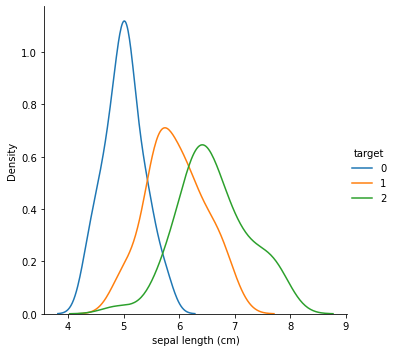

In [ ]:
sns.FacetGrid(X, hue='target', height=5).map(sns.kdeplot, 'sepal length (cm)').add_legend()
plt.show()

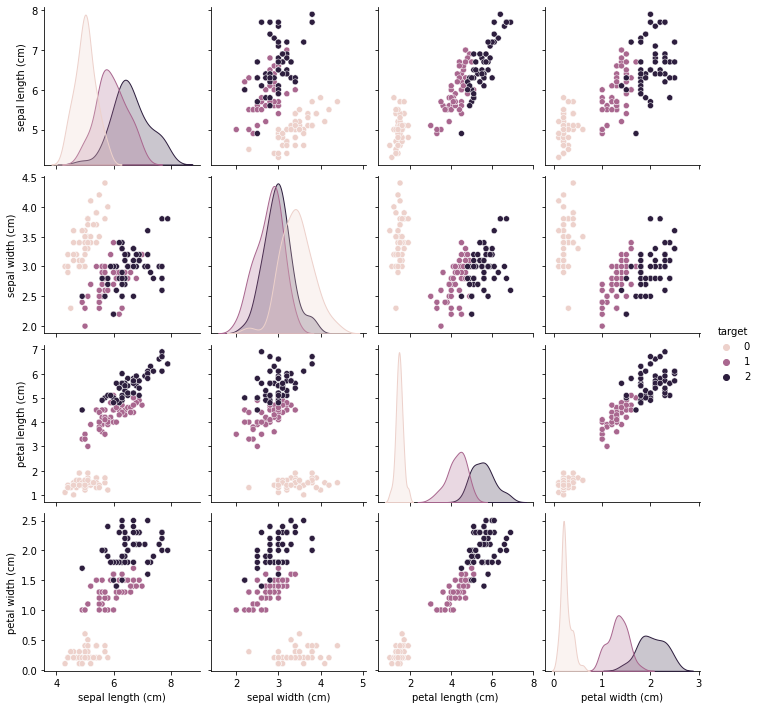

In [ ]:
sns.pairplot(X, hue='target')
plt.show()

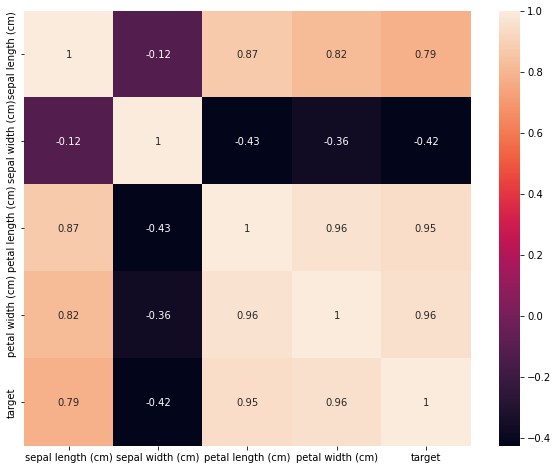

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Train Test Split

In [ ]:
y = X['target']
X = X.drop(['target'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12)

# Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def multiclass_eval (y_true, y_pred, name=''):
    """
    Multiclass evaluation function. This function only focus on Accuracy,
    Recall and Precision of each class.
    
    Parameters
    ----------
    
    y_true:    array
        target of prediction
    
    y_pred:    array
        predicted target

    name:  String
        Name of Model
    
    Printed Information
    -------------------
    1. Cunfusion Matrix
    2. Accuracy
    3. Recall of each class
    4. Precision of each class
    """
    cm = confusion_matrix(y_true, y_pred)
    # Number of Classes
    classes = cm.shape[0]

    # Define Placeholder
    true_vals = []
    actual_side = []
    pred_side = []

    # Loop to get the result
    for i in range(0, classes):
        true_vals.append(cm[i][i])
        actual_side.append(sum(cm[i]))
        pred_side.append(sum(cm.T[i]))

    # Accuracy
    accuracy = sum(true_vals) / sum(actual_side)
    print(name, 'Model Performance')
    print(cm, '\n')
    print('Accuracy          :', round(accuracy * 100, 1), '%')

    # Loop to get Recall and Precision
    for i in range(0, classes):
        print('\nClass', i, 'Overview:')
        recall    = true_vals[i] / actual_side[i]
        precision = true_vals[i] / pred_side[i]
        f1_score = (2 * precision * recall) / (precision + recall)
        print('Recall Class', i,'   :', round(recall * 100, 1), '%')
        print('Precision Class', i,':', round(precision * 100, 1), '%')
        print('F1 Score  Class', i,':', round(f1_score * 100, 1), '%')

In [ ]:
# KNN Training
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_tr = knn.predict(X_train)
y_pred_ts = knn.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(y_train, y_pred_tr, name='KNN - Training')

KNN - Training Model Performance
[[ 9  0  0]
 [ 0  7  0]
 [ 0  0 13]] 

Accuracy          : 100.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 100.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 100.0 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 100.0 %
F1 Score  Class 2 : 100.0 %


In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_ts, name='KNN - Testing')

KNN - Testing Model Performance
[[41  0  0]
 [ 0 36  7]
 [ 0  1 35]] 

Accuracy          : 93.3 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 83.7 %
Precision Class 1 : 97.3 %
F1 Score  Class 1 : 90.0 %

Class 2 Overview:
Recall Class 2    : 97.2 %
Precision Class 2 : 83.3 %
F1 Score  Class 2 : 89.7 %


In [ ]:
# Dectree Training
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tr = dectree.predict(X_train)
y_pred_ts = dectree.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(y_train, y_pred_tr, name='Dectree - Training')

Dectree - Training Model Performance
[[ 9  0  0]
 [ 0  7  0]
 [ 0  0 13]] 

Accuracy          : 100.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 100.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 100.0 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 100.0 %
F1 Score  Class 2 : 100.0 %


In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_ts, name='Dectree - Testing')

Dectree - Testing Model Performance
[[41  0  0]
 [ 0 39  4]
 [ 0  3 33]] 

Accuracy          : 94.2 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 90.7 %
Precision Class 1 : 92.9 %
F1 Score  Class 1 : 91.8 %

Class 2 Overview:
Recall Class 2    : 91.7 %
Precision Class 2 : 89.2 %
F1 Score  Class 2 : 90.4 %


In [ ]:
dectree.feature_importances_

array([0.        , 0.        , 0.57864391, 0.42135609])

In [ ]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Logreg Training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_tr = logreg.predict(X_train)
y_pred_ts = logreg.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(y_train, y_pred_tr, name='Logreg - Training')

Logreg - Training Model Performance
[[ 9  0  0]
 [ 0  7  0]
 [ 0  0 13]] 

Accuracy          : 100.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 100.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 100.0 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 100.0 %
F1 Score  Class 2 : 100.0 %


In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_ts, name='Logreg - Testing')

Logreg - Testing Model Performance
[[41  0  0]
 [ 0 37  6]
 [ 0  0 36]] 

Accuracy          : 95.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 86.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 92.5 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 85.7 %
F1 Score  Class 2 : 92.3 %


In [ ]:
logreg.coef_

array([[-0.51122029,  0.3014118 , -1.43187993, -0.56867061],
       [ 0.32759238, -0.14428139, -0.15613766, -0.29866523],
       [ 0.18362791, -0.15713041,  1.58801759,  0.86733584]])

In [ ]:
# Ranfor Training
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_tr = ranfor.predict(X_train)
y_pred_ts = ranfor.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(y_train, y_pred_tr, name='Ranfor - Training')

Ranfor - Training Model Performance
[[ 9  0  0]
 [ 0  7  0]
 [ 0  0 13]] 

Accuracy          : 100.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 100.0 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 100.0 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 100.0 %
F1 Score  Class 2 : 100.0 %


In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_ts, name='Ranfor - Testing')

Ranfor - Testing Model Performance
[[41  0  0]
 [ 0 38  5]
 [ 0  1 35]] 

Accuracy          : 95.0 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 88.4 %
Precision Class 1 : 97.4 %
F1 Score  Class 1 : 92.7 %

Class 2 Overview:
Recall Class 2    : 97.2 %
Precision Class 2 : 87.5 %
F1 Score  Class 2 : 92.1 %


In [ ]:
ranfor.feature_importances_

array([0.19136236, 0.02727   , 0.44415059, 0.33721705])

# Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
knn_imp = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=0)
knn_imp.importances_mean

array([-0.01166667, -0.01416667,  0.54166667,  0.06666667])

In [ ]:
logreg_imp = permutation_importance(logreg, X_test, y_test, n_repeats=10, random_state=0)
logreg_imp.importances_mean

array([0.01666667, 0.01083333, 0.54416667, 0.09083333])

In [ ]:
dectree_imp = permutation_importance(dectree, X_test, y_test, n_repeats=10, random_state=0)
dectree_imp.importances_mean

array([0.        , 0.        , 0.36833333, 0.3225    ])

In [ ]:
ranfor_imp = permutation_importance(ranfor, X_test, y_test, n_repeats=10, random_state=0)
ranfor_imp.importances_mean

array([0.        , 0.        , 0.30166667, 0.0675    ])

# PCA

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X['target'] = y
X.drop_duplicates(inplace=True)

In [ ]:
y = X['target']
X = X.drop(['target'], axis=1)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X)

PCA()

In [ ]:
# If total > 80%
pca.explained_variance_ratio_

array([0.92497081, 0.05276705, 0.0170316 , 0.00523054])

In [ ]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.8, random_state=12)

In [ ]:
# Logreg Training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_tr = logreg.predict(X_train)
y_pred_ts = logreg.predict(X_test)

In [ ]:
# Performance training
multiclass_eval(y_train, y_pred_tr, name='Logreg - Training')

Logreg - Training Model Performance
[[ 9  0  0]
 [ 0  6  1]
 [ 0  0 13]] 

Accuracy          : 96.6 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 85.7 %
Precision Class 1 : 100.0 %
F1 Score  Class 1 : 92.3 %

Class 2 Overview:
Recall Class 2    : 100.0 %
Precision Class 2 : 92.9 %
F1 Score  Class 2 : 96.3 %


In [ ]:
# Performance testing
multiclass_eval(y_test, y_pred_ts, name='Logreg - Testing')

Logreg - Testing Model Performance
[[41  0  0]
 [ 0 39  4]
 [ 0  1 35]] 

Accuracy          : 95.8 %

Class 0 Overview:
Recall Class 0    : 100.0 %
Precision Class 0 : 100.0 %
F1 Score  Class 0 : 100.0 %

Class 1 Overview:
Recall Class 1    : 90.7 %
Precision Class 1 : 97.5 %
F1 Score  Class 1 : 94.0 %

Class 2 Overview:
Recall Class 2    : 97.2 %
Precision Class 2 : 89.7 %
F1 Score  Class 2 : 93.3 %


In [ ]:
viz = pd.DataFrame(reduced_X, columns=['pc1', 'pc2'])
viz['target'] = y

In [ ]:
viz

,pc1,pc2,target
0,-2.674170,0.319032,0.0
1,-2.704744,-0.178634,0.0
2,-2.879708,-0.144700,0.0
3,-2.736313,-0.318120,0.0
4,-2.718834,0.327305,0.0
...,...,...,...
144,1.953752,0.182135,2.0
145,1.536230,-0.382204,2.0
146,1.773860,0.073456,2.0
147,1.910099,0.115266,2.0


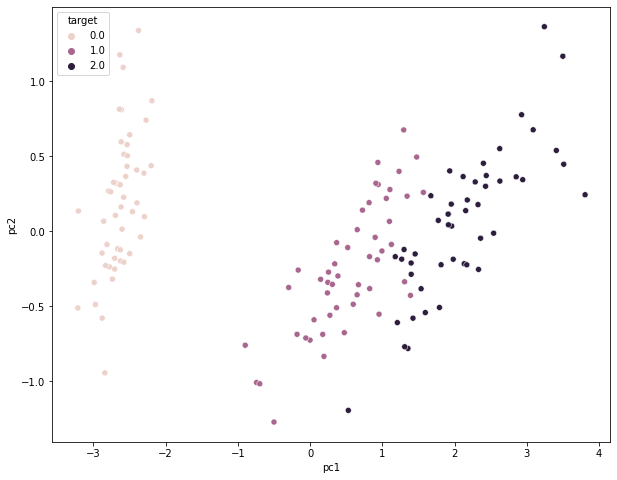

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=viz, x='pc1', y='pc2', hue='target')
plt.show()